In [41]:
import sys
!{sys.executable} -m pip install opencv-python

import cv2
import numpy as np
import scipy.ndimage as ndi
import skimage
from skimage.transform import hough_circle, hough_circle_peaks
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [47]:
def GetCandidateArea(image):
    blue, green, red = cv2.split(image)
    green_blurred = cv2.GaussianBlur(green, (15, 15), 0)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    green = ndi.grey_opening(green_blurred, structure=kernel)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(green)
    x0 = int(maxLoc[0]) - 120
    y0 = int(maxLoc[1]) - 120
    x1 = int(maxLoc[0]) + 120
    y1 = int(maxLoc[1]) + 120
    return x0, x1, y0, y1, image[y0:y1, x0:x1]

In [48]:
def show_img(img):
    skimage.io.imshow(img)
    skimage.io.show()

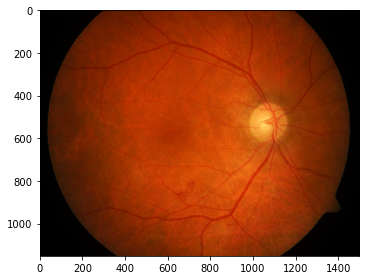

In [67]:
image = skimage.io.imread('C:/Users/LaraLiL/Desktop/image073.jpg')  # change to parameter
show_img(image)

In [51]:
def Preprocessing(image):
    blue, green, red = cv2.split(image)
    red_blurred = cv2.GaussianBlur(red, (5, 5), 0)
    red_unsharp = cv2.addWeighted(red, 1.5, red_blurred, -0.5, 0, red)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31))
    red_closed = ndi.grey_closing(red_unsharp, structure=kernel)
    res = cv2.equalizeHist(red_closed)
    return res

In [52]:
def CannyEdge(img, sigma):
    v = np.mean(img)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edge = cv2.Canny(img, lower, upper)
    return edge

In [53]:
def HoughCircle(edge, limm, limM):
    hough_radii = np.arange(limm, limM, 1)
    hough_res = hough_circle(edge, hough_radii)
    hough_peaks = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)
    return hough_peaks

In [68]:
size_y, size_x, size_z = np.shape(image)
print(size_y, size_x, size_z)

1152 1500 3


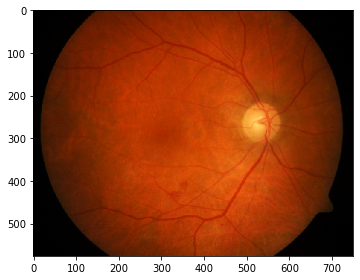

In [69]:
image_resized = cv2.resize(image, (round(size_x / 2), round(size_y / 2)), interpolation=cv2.INTER_CUBIC)
show_img(image_resized)

397 637 132 372 [[[187  58   3]
  [186  56   2]
  [187  51   2]
  ...
  [119  35   0]
  [120  36   0]
  [120  38   0]]

 [[187  56   8]
  [183  50   5]
  [183  48   2]
  ...
  [120  36   6]
  [119  36   0]
  [119  37   0]]

 [[184  49   2]
  [182  46   1]
  [183  47   5]
  ...
  [119  36   6]
  [120  36   1]
  [120  38   0]]

 ...

 [[215  68   2]
  [216  71  10]
  [216  70  10]
  ...
  [128  45   4]
  [123  42   1]
  [122  40   2]]

 [[214  73   3]
  [212  71   6]
  [211  72   3]
  ...
  [123  41   1]
  [123  43   5]
  [120  42   2]]

 [[215  80   8]
  [215  78   9]
  [212  78   6]
  ...
  [124  41   2]
  [120  43   3]
  [120  40   5]]]


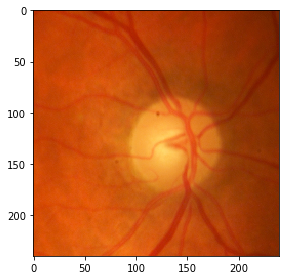

In [70]:
x0_b, x1_b, y0_b, y1_b, area = GetCandidateArea(image_resized)
print(x0_b, x1_b, y0_b, y1_b, area)
show_img(area)

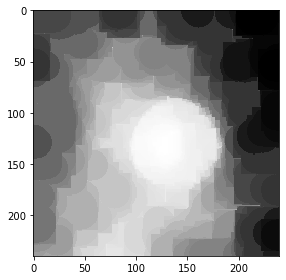

In [71]:
pp_area = Preprocessing(area)
show_img(pp_area)

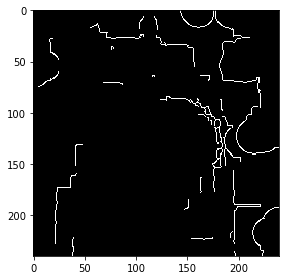

In [72]:
edge_image = CannyEdge(pp_area, 0.22)
show_img(edge_image)

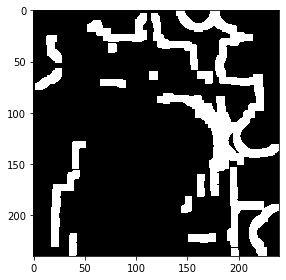

In [73]:
kernel = np.ones((3, 3), np.uint8)
edge_image = cv2.dilate(edge_image, kernel, iterations=3)
show_img(edge_image)

In [74]:
accum, cx, cy, radii = HoughCircle(edge_image, 55, 80)
print(accum, cx, cy, radii)

[0.496875] [168] [68] [55]


In [86]:
bw = np.zeros((size_y, size_x))
print(bw)

center_coordinates = (int(x0_b * 2 + cx * 2),  int(y0_b * 2 + cy * 2))
print(center_coordinates)

radius = int(radii * 2)
print(radius)

color = (255,255,255)

thickness = -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1130, 400)
110


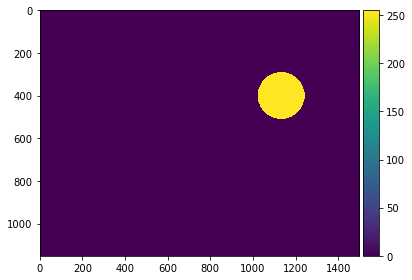

In [88]:
bw = cv2.circle(bw, center_coordinates, radius, color, thickness)
show_img(bw)